In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time
import numpy as np
from sklearn.svm import SVC
import pandas as pd
from collections import Counter
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,_BaseNB

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()
#10 to 100x fast

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:

lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.5)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw.data.shape

(1140, 2914)

In [6]:
lfw.images.shape
imtotal,imx,imy=lfw.images.shape

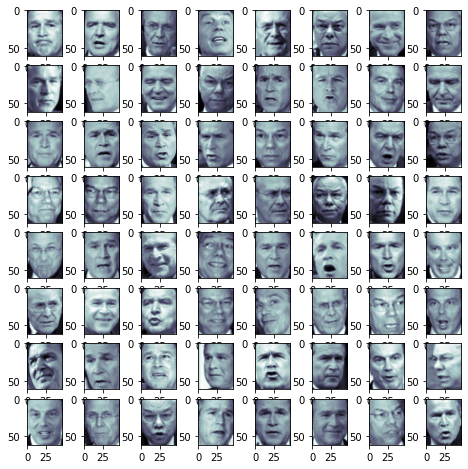

In [7]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone) 

In [8]:
x,y=lfw.data,lfw.target


In [9]:
print(imblearn.__version__)

0.7.0


In [10]:
# oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy="not majority",)
# x_u,y_u=oversample.fit_resample(x,y)

In [11]:
# Counter(y_u),Counter(y)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [13]:

# oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy="not majority",)
# x_train,y_train=oversample.fit_resample(x_train,y_train)

In [14]:
# oversample.
x_train.shape,x_test.shape,x.shape

((855, 2914), (285, 2914), (1140, 2914))

In [15]:
pca_oliv=PCA()
pca_oliv.fit(x_train)


PCA()

In [16]:
k=0
currsum=0
while currsum<0.90:
    currsum+=pca_oliv.explained_variance_ratio_[k]
    k+=1
k

78

In [17]:
pca_lwf=PCA(n_components=k,whiten=True)#check for false


In [18]:
x_train.shape

(855, 2914)

In [19]:
len(x_train)

855

In [20]:
# clf=ensemble.RandomForestClassifier()
# grid={"max_leaf_nodes":list(np.arange(10,300))}
# gscv=GridSearchCV(clf,grid)
# gscv.fit(x_train,y_train)
# gscv.best_estimator_

In [21]:
# gscv.best_score_

In [22]:
# gscv.cv_results_

In [23]:
# clf=SVC()
# grid={"gamma":[.01,.1,1,10,100],"C":[.01,.1,1,10,100]}
# gscv=GridSearchCV(clf,grid)
# gscv.fit(x_train,y_train)
# gscv.best_estimator_

In [24]:
# gscv.best_score_

In [25]:
# gscv.cv_results_

In [26]:
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy="not majority")
x_train,y_train=oversample.fit_resample(x_train,y_train)

In [27]:
x_transformed=pca_lwf.fit_transform(x_train)

In [28]:
pca_lwf.n_components

78

In [29]:
x_transformed.shape

(2040, 78)

In [30]:
x_approx=pca_lwf.inverse_transform(x_transformed)
x_approx=x_approx.reshape((len(x_train),imx,imy))

In [31]:
x_approx.shape

(2040, 62, 47)

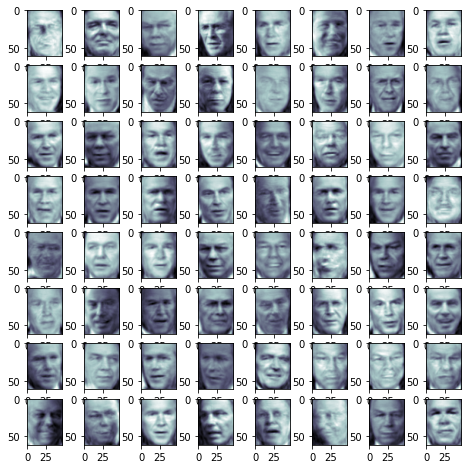

In [32]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    plt.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [33]:
eigen=pca_lwf.components_
eigen_faces=eigen.reshape((eigen.shape[0],imx,imy))

In [34]:
eigen.shape

(78, 2914)

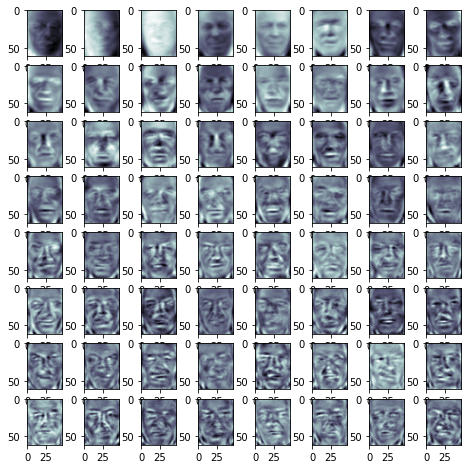

In [35]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    plt.imshow(eigen_faces[i],cmap=plt.cm.bone)
plt.show()

In [36]:
x_train_pca=x_transformed
x_test_pca=pca_lwf.transform(x_test)

## Random Forest

In [37]:
# rf=ensemble.RandomForestClassifier(random_state=0)
# start=time.time()
# rf.fit(x_train,y_train)
# print("Time taken = ",time.time()-start)
# y_pred=rf.predict(x_test)
# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

In [38]:
# oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy="not majority")
# x_train,y_train=oversample.fit_resample(x_train,y_train)

In [39]:
#without PCA score
rf=ensemble.RandomForestClassifier(max_leaf_nodes=137,random_state=0)
start=time.time()
rf.fit(x_train,y_train)
print("Time taken = ",time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time taken =  0.18258237838745117
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        61
           1       0.93      0.36      0.52        36
           2       0.70      0.99      0.82       122
           3       0.91      0.65      0.75        31
           4       0.93      0.40      0.56        35

    accuracy                           0.76       285
   macro avg       0.86      0.64      0.69       285
weighted avg       0.80      0.76      0.74       285

[[ 50   0  11   0   0]
 [  9  13  14   0   0]
 [  1   0 121   0   0]
 [  1   1   8  20   1]
 [  1   0  18   2  14]]


In [40]:
#PCA score
rf=ensemble.RandomForestClassifier(max_leaf_nodes=137,random_state=0)
start=time.time()
rf.fit(x_train_pca,y_train)
print("Time taken = ",time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time taken =  0.4615602493286133
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        61
           1       0.83      0.28      0.42        36
           2       0.67      0.97      0.79       122
           3       0.87      0.42      0.57        31
           4       0.95      0.60      0.74        35

    accuracy                           0.75       285
   macro avg       0.83      0.62      0.67       285
weighted avg       0.79      0.75      0.72       285

[[ 51   0  10   0   0]
 [  4  10  21   1   0]
 [  2   0 118   1   1]
 [  2   1  15  13   0]
 [  1   1  12   0  21]]


In [41]:
print(rf.score(x_train_pca,y_train),rf.score(x_test_pca,y_test))

1.0 0.7473684210526316


## SVC


In [42]:
svc=SVC()
start=time.time()
svc.fit(x_train,y_train)
print("Time taken = ",time.time()-start)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time taken =  1.6647226810455322
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.90      0.78      0.84        36
           2       0.88      0.97      0.92       122
           3       0.89      0.81      0.85        31
           4       0.93      0.80      0.86        35

    accuracy                           0.90       285
   macro avg       0.91      0.86      0.88       285
weighted avg       0.90      0.90      0.90       285

[[ 57   1   3   0   0]
 [  2  28   6   0   0]
 [  1   1 118   1   1]
 [  1   1   3  25   1]
 [  1   0   4   2  28]]


In [43]:
print(svc.score(x_train,y_train),svc.score(x_test,y_test))

0.9950980392156863 0.8982456140350877


In [44]:
svc=SVC()
start=time.time()
svc.fit(x_train_pca,y_train)
print("Time taken = ",time.time()-start)
y_pred=svc.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time taken =  0.09866595268249512
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        61
           1       0.97      0.81      0.88        36
           2       0.90      0.98      0.94       122
           3       0.92      0.74      0.82        31
           4       0.97      0.86      0.91        35

    accuracy                           0.92       285
   macro avg       0.93      0.87      0.90       285
weighted avg       0.92      0.92      0.91       285

[[ 59   0   2   0   0]
 [  3  29   4   0   0]
 [  0   0 120   2   0]
 [  3   1   3  23   1]
 [  0   0   5   0  30]]


In [45]:
print(svc.score(x_train_pca,y_train),svc.score(x_test_pca,y_test))

0.9980392156862745 0.9157894736842105


## Logistic Regression

In [46]:
#non PCA
lr=LogisticRegression()
start=time.time()
lr.fit(x_train,y_train)
print("Time taken = ",time.time()-start)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time taken =  0.640056848526001
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        61
           1       0.85      0.81      0.83        36
           2       0.87      0.93      0.90       122
           3       0.89      0.77      0.83        31
           4       0.86      0.86      0.86        35

    accuracy                           0.87       285
   macro avg       0.87      0.85      0.86       285
weighted avg       0.87      0.87      0.87       285

[[ 53   2   4   0   2]
 [  2  29   5   0   0]
 [  2   2 113   3   2]
 [  2   1   3  24   1]
 [  0   0   5   0  30]]


c:\Users\Dell\anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:459: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#PCA
lr=LogisticRegression()
start=time.time()
lr.fit(x_train_pca,y_train)
print("Time taken = ",time.time()-start)
y_pred=lr.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time taken =  0.013647079467773438
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        61
           1       0.82      0.78      0.80        36
           2       0.92      0.89      0.90       122
           3       0.77      0.74      0.75        31
           4       0.79      0.86      0.82        35

    accuracy                           0.85       285
   macro avg       0.82      0.83      0.82       285
weighted avg       0.85      0.85      0.85       285

[[ 53   3   3   1   1]
 [  4  28   4   0   0]
 [  5   0 108   4   5]
 [  2   3   1  23   2]
 [  1   0   2   2  30]]


In [48]:
print(lr.score(x_train_pca,y_train),lr.score(x_test_pca,y_test))

0.9808823529411764 0.8491228070175438


## Naive Bayes

In [49]:
gnb=GaussianNB()
start=time.time()
gnb.fit(x_train,y_train)
print("Time taken = ",time.time()-start)
y_pred=gnb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Time taken =  0.03271055221557617
              precision    recall  f1-score   support

           0       0.43      0.59      0.50        61
           1       0.48      0.58      0.53        36
           2       0.77      0.63      0.69       122
           3       0.43      0.32      0.37        31
           4       0.53      0.51      0.52        35

    accuracy                           0.57       285
   macro avg       0.53      0.53      0.52       285
weighted avg       0.59      0.57      0.57       285

[[36 10 11  2  2]
 [ 9 21  4  0  2]
 [22  8 77  8  7]
 [ 8  4  4 10  5]
 [ 9  1  4  3 18]]


In [50]:
gnb=GaussianNB()
start=time.time()
gnb.fit(x_train_pca,y_train)
print("Time taken = ",time.time()-start)
y_pred=gnb.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Time taken =  0.0029952526092529297
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        61
           1       0.74      0.64      0.69        36
           2       0.87      0.86      0.86       122
           3       0.64      0.87      0.74        31
           4       0.67      0.63      0.65        35

    accuracy                           0.80       285
   macro avg       0.76      0.77      0.76       285
weighted avg       0.81      0.80      0.80       285

[[ 51   2   3   1   4]
 [  4  23   5   3   1]
 [  3   4 105   4   6]
 [  0   2   2  27   0]
 [  0   0   6   7  22]]


In [51]:
print(gnb.score(x_train_pca,y_train),gnb.score(x_test_pca,y_test))

0.8941176470588236 0.8
